In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Datasets/car_price_prediction.csv')

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df = df.drop(columns=["ID", "Doors"])

In [6]:
df.duplicated().sum()

3512

In [7]:
df.drop_duplicates()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,Left wheel,Silver,12
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4


In [8]:
df = df[~(df["Levy"] == '-')]

In [9]:
df['Mileage'] = df['Mileage'].str.split(' ').str.get(0).astype('int')

In [10]:
cols = ['Price', 'Mileage', "Levy"]

df[cols] = df[cols].astype('float')

for col in cols:
    quartiles = df[col].quantile([0.1, 0.8])
    q1 = quartiles.loc[0.1]
    q3 = quartiles.loc[0.8]

    low_bound = q1 - 1.5 * (q3 - q1)
    upp_bound = q3 + 1.5 * (q3 - q1)

    df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]


In [11]:
df.shape

(12684, 16)

In [12]:
df['Price'].value_counts()

Price
470.0      257
392.0      232
314.0      213
627.0      189
15681.0    187
          ... 
53031.0      1
21492.0      1
41397.0      1
15200.0      1
22075.0      1
Name: count, Length: 1913, dtype: int64

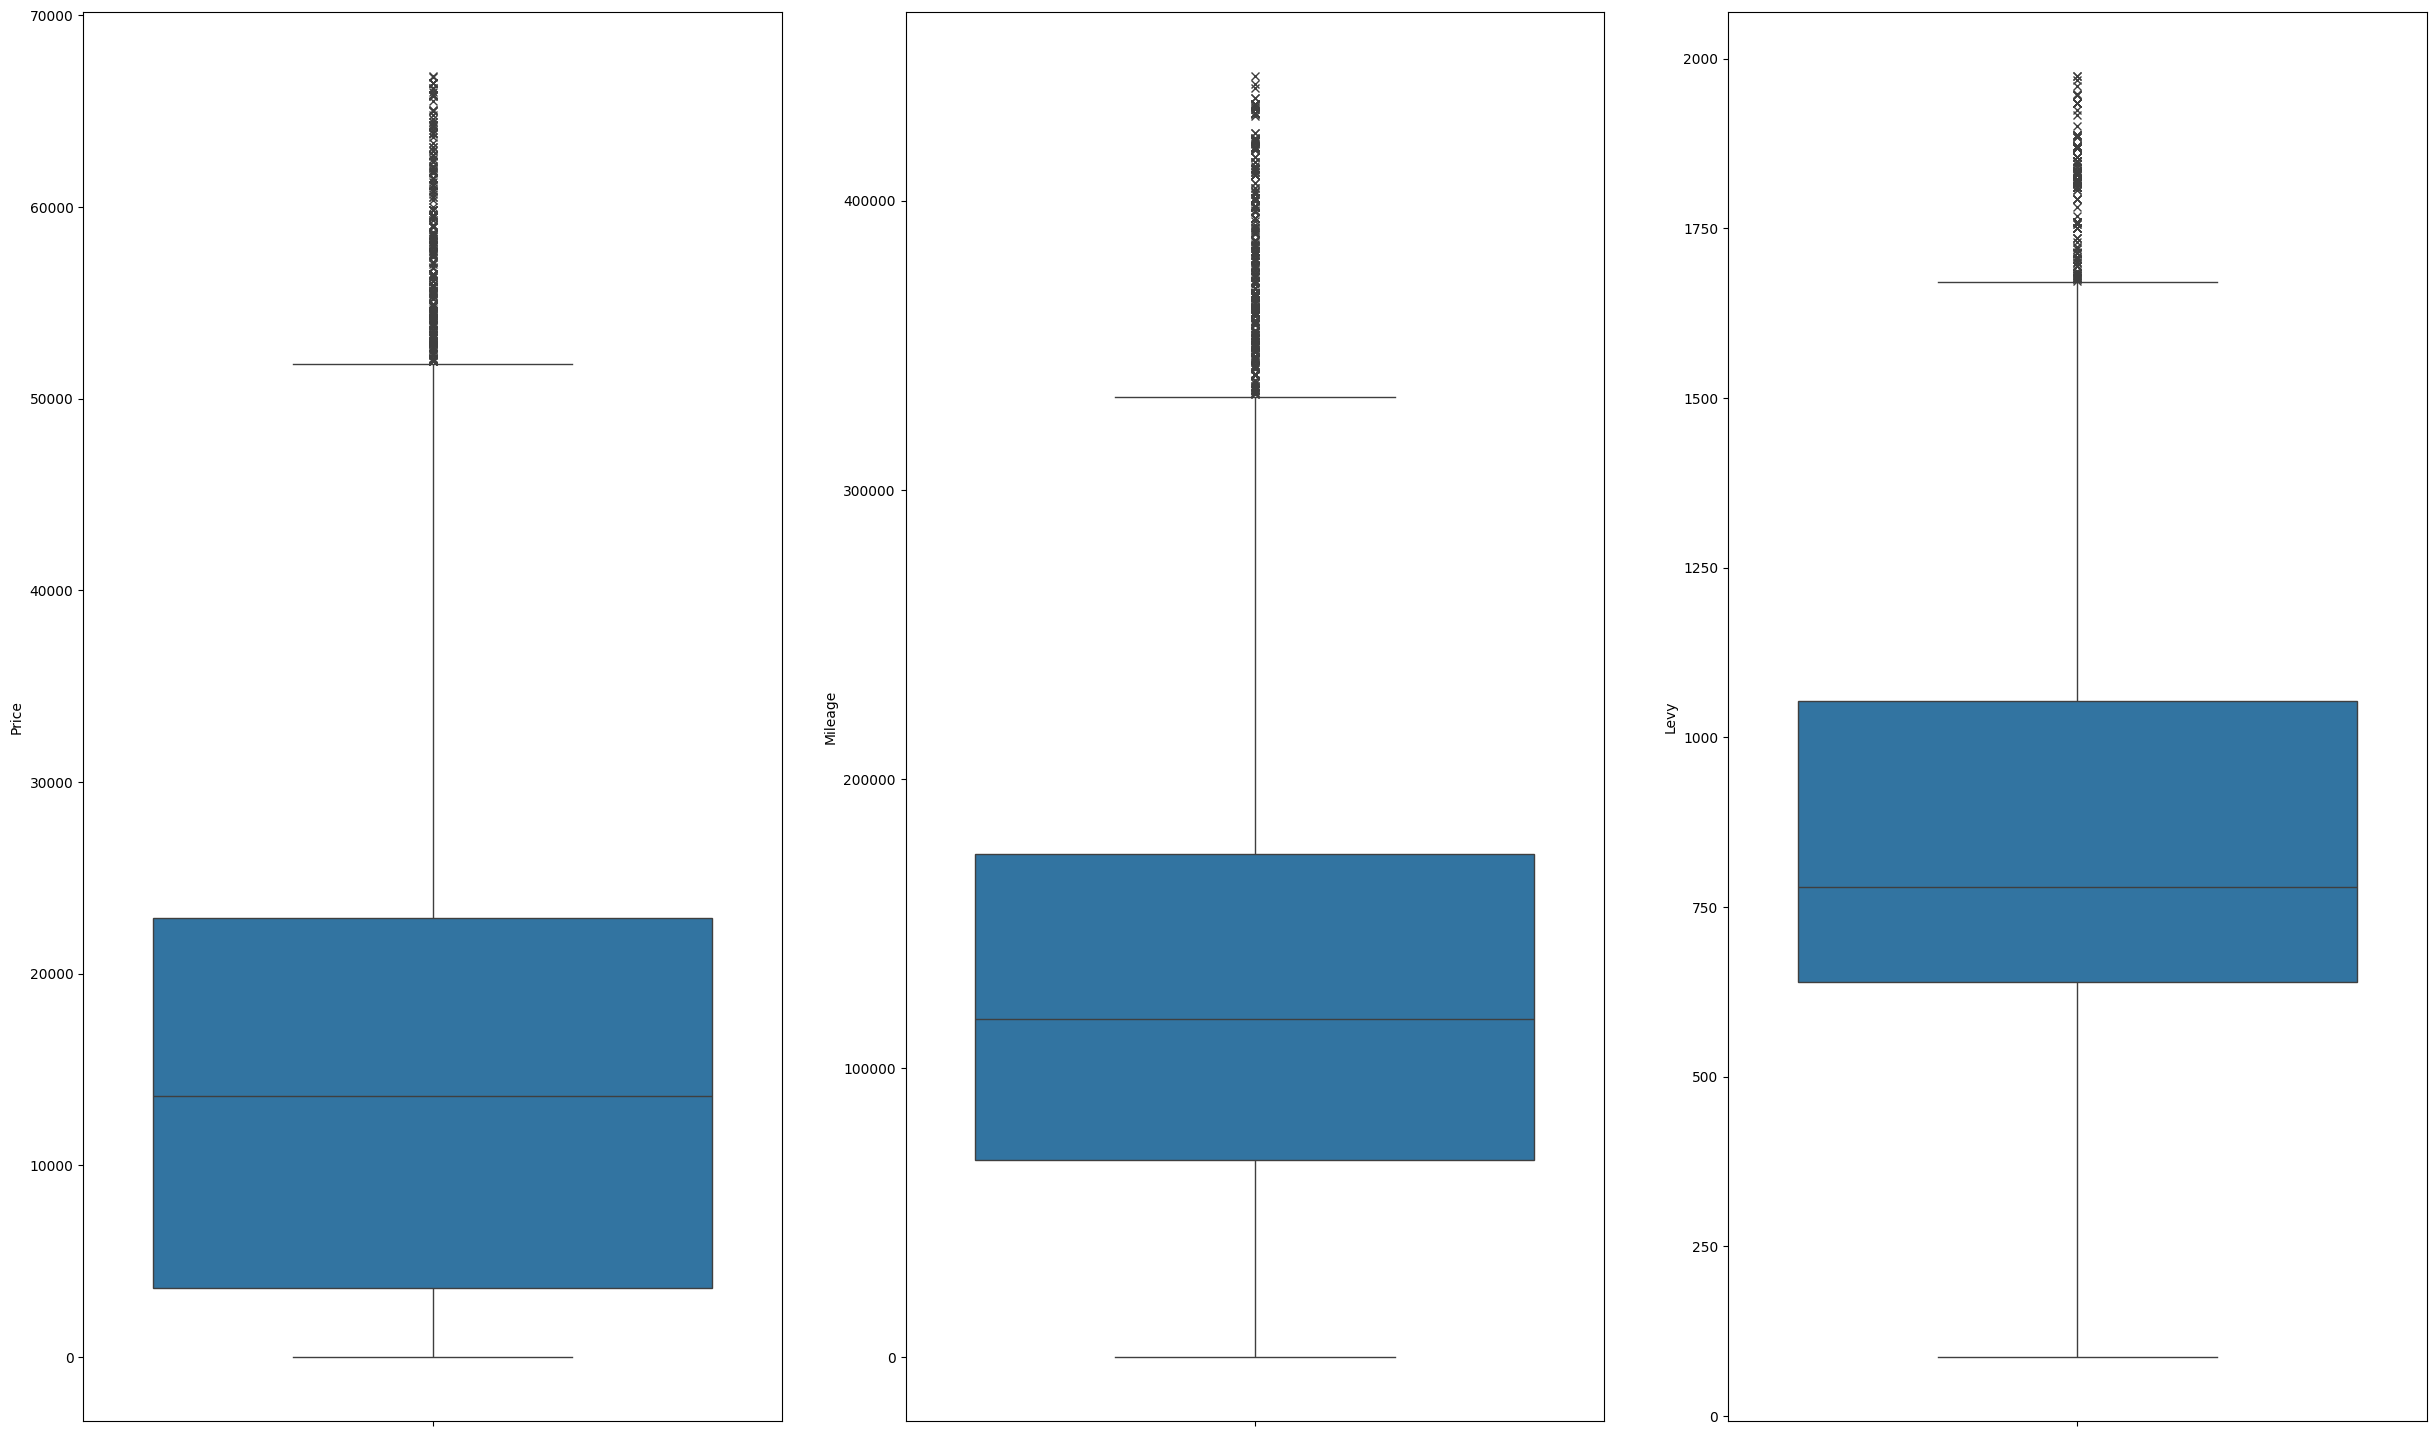

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

sns.boxplot(df['Price'], flierprops={"marker": "x"}, ax=axes[0])

sns.boxplot(df['Mileage'], flierprops={"marker": "x"}, ax=axes[1])

sns.boxplot(df['Levy'], flierprops={"marker": "x"}, ax=axes[2])

plt.tight_layout(pad=3)

plt.show()

In [14]:
cols = ["Manufacturer", "Model", "Prod. year", "Category", "Leather interior", "Fuel type", "Engine volume", "Gear box type",
        "Drive wheels", "Wheel", "Color"]

def label_encode(df, columns_to_encode):
    for column in columns_to_encode:
        le = LabelEncoder()
        df.loc[:, column] = le.fit_transform(df[column])

    return df

df = label_encode(df, cols)

In [15]:
columns = [ "Mileage", "Levy", "Price"]
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [16]:
df.describe()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
count,1.268400e+04,1.268400e+04,12684.000000,1.268400e+04,12684.000000,12684.000000
mean,1.232414e-17,6.162070e-17,20.139467,2.072696e-17,4.452933,6.950725
std,1.000039e+00,1.000039e+00,2.867742,1.000039e+00,1.018434,4.458453
min,-1.116196e+00,-2.355460e+00,0.000000,-1.527931e+00,1.000000,0.000000
25%,-8.668301e-01,-6.753179e-01,18.000000,-7.264642e-01,4.000000,4.000000
50%,-1.728785e-01,-2.530037e-01,20.000000,-1.544959e-01,4.000000,5.000000
75%,4.669262e-01,5.794718e-01,22.000000,5.158579e-01,4.000000,12.000000
max,3.504201e+00,3.377683e+00,27.000000,3.672728e+00,16.000000,16.000000


In [17]:
df.shape

(12684, 16)

In [18]:
df = df.astype('float')

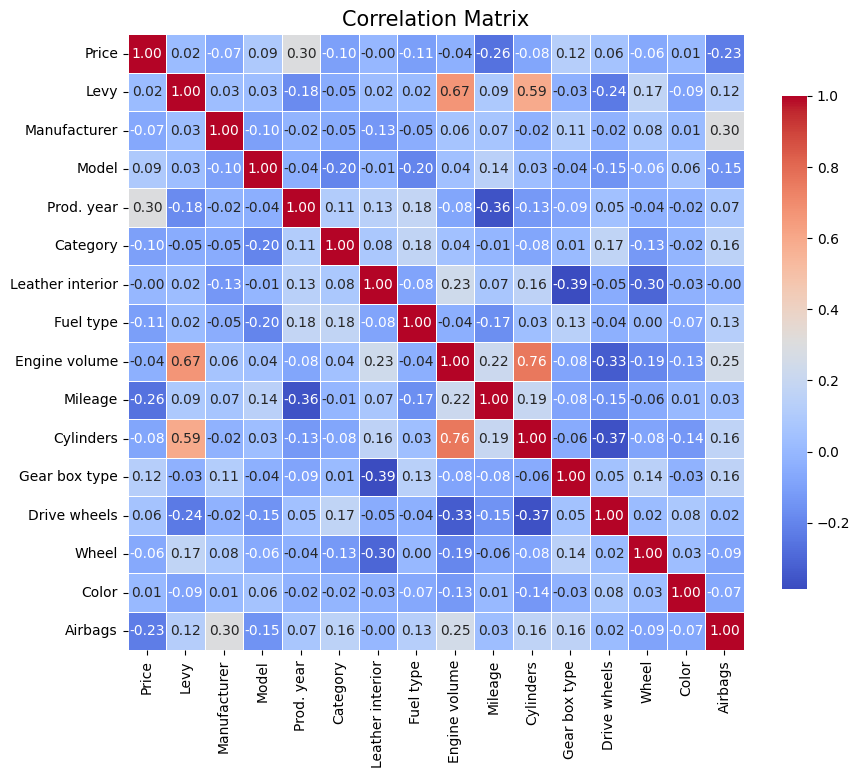

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', size=15)
plt.show()


In [20]:
df.to_csv('../Cleaned Datasets/prices_cleaned.csv', index=False)